In [ ]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from pytictoc import TicToc

#
D = 5

#  
z = np.random.randn(D)

#  
Nset = np.array([10, 100, 1000, 10000, 100000, 1000000])

t = TicToc()
t1 = []
t2 = []

for N in Nset:
    
    X = np.random.rand(N, D)

    t.tic()
    dist1 = np.zeros(N)
    for n in range(0, N):
        dist1[n] = np.sqrt( np.sum( (X[n,:]-z)**2 ) )
    t.toc()
    t1 = np.append(t1, t.tocvalue())
    
    t.tic()
    dist2 = np.zeros(N)
    Z = np.matlib.repmat(z.reshape((1,D)), N, 1)  # z 행벡터 N개 복사 -> NxZ 행렬 만들기
    dist2 = np.sqrt( np.sum((X-Z)**2, axis=1) )  # 행렬끼리 연산 ( 반복문 x )
    t.toc()
    t2 = np.append(t2, t.tocvalue())

Elapsed time is 0.001359 seconds.
Elapsed time is 0.008012 seconds.
Elapsed time is 0.001241 seconds.
Elapsed time is 0.000087 seconds.
Elapsed time is 0.012561 seconds.
Elapsed time is 0.000669 seconds.
Elapsed time is 0.121917 seconds.
Elapsed time is 0.001998 seconds.
Elapsed time is 1.333376 seconds.
Elapsed time is 0.010414 seconds.
Elapsed time is 13.125530 seconds.
Elapsed time is 0.106968 seconds.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


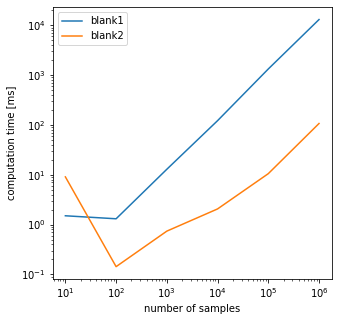

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(Nset, 1e3*t1)
plt.plot(Nset, 1e3*t2)
plt.xlabel("number of samples")
plt.ylabel("computation time [ms]")
plt.xscale("log")
plt.yscale("log")
plt.legend({'blank1','blank2'})
plt.savefig('code.eps')